![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

# 04 | Overfitting & Hyperparameter Tuning with Cross Validation

## Chapter Importance

We have already covered:

1. Regression Models
2. Classification Models
3. Train Test Split for Model Selection

In short, we have computed all possible types of models to predict numerical and categorical variables with Regression and Classification models, respectively.

Although it is not enough with computing one model, we need to compare different models to choose the one whose predictions are close to reality.

Nevertheless, we cannot evaluate the model on the same data we used to `.fit()` (train) the mathematical equation (model). We need to separate the data into train and test sets; the first to train the model, the later to evaluate the model.

No we add an extra layer of complexity because we can improve a model (an algorithm) by configuring its parameters. This chapter is all about **computing different combinations of a single model's hyperparameters** to get the best.

## [ ] Load the [Data](https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset)

- The goal of this dataset is
- To predict if **bank's customers** (rows) `default` next month
- Based on their **socio-demographical characteristics** (columns)

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'
df_credit = pd.read_excel(io=url, header=1, index_col=0)
df_credit.sample(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
10522,100000,1,2,1,51,3,4,3,2,2,2,56002,55557,54083,54601,55585,57027,1000,0,2000,2000,2500,0,1
11962,500000,1,1,1,42,-1,-1,-1,-1,-1,-1,29365,94120,36511,18323,7865,7960,94135,36575,18323,13445,9016,7077,0
9708,150000,1,2,2,49,0,0,0,0,0,0,151822,86002,75782,76333,77956,77553,2985,2700,5000,2823,2865,2679,1
18957,130000,2,5,2,39,-1,-1,-1,-1,-1,-1,264,264,264,264,0,678,264,264,264,0,942,0,0
23022,220000,2,2,1,40,-1,-1,-1,-1,0,0,1129,227,0,13137,13637,9744,227,0,13137,1500,214,0,0
9065,100000,2,2,2,32,0,0,0,0,0,0,54933,56151,56677,58237,59643,63275,2700,2055,2500,2500,4800,2500,0
24835,350000,1,1,2,30,2,2,-1,2,0,0,832,0,1844,1248,832,416,0,1844,0,0,0,832,1
9642,150000,2,2,2,29,0,0,0,0,0,0,94409,92047,79088,81399,74009,65871,5000,5000,5000,6000,5000,4000,0
18072,60000,1,2,2,36,2,2,2,2,2,2,48547,49446,49857,50737,52602,53613,2000,1500,2000,3000,2000,2000,1


## Preprocess the Data

### Missing Data

In [2]:
df_credit.isna().sum().sum()

0

### Dummy Variables

In [3]:
df_credit

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1


## Feature Selection

In [4]:
y = df_credit["default payment next month"]

In [5]:
X = df_credit.drop(columns="default payment next month")

## Train Test Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## [ ] `DecisionTreeClassifier()` with Default Hyperparameters

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
model_dt = DecisionTreeClassifier()

In [10]:
model_dt.fit(X=X_train, y=y_train)

DecisionTreeClassifier()

### Accuracy

#### In `train` data

In [11]:
model_dt.score(X_train, y_train)

0.9995024875621891

#### In `test` data

In [12]:
model_dt.score(X_test, y_test)

0.7313131313131314

### Model Visualization

In [13]:
#from sklearn.tree import plot_tree

#plot_tree(decision_tree=model_dt, feature_names=X_train.columns, filled=True);

## `DecisionTreeClassifier()` with Custom Hyperparameters

### 1st Configuration

In [14]:
model_dt = DecisionTreeClassifier(max_depth=3)

In [15]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

#### Accuracy

##### In `train` data

In [16]:
model_dt.score(X_train, y_train)

0.8207960199004976

##### In `test` data

*Now we get the same good score with both type of data*

In [17]:
model_dt.score(X_test, y_test)

0.8222222222222222

#### Model Visualization

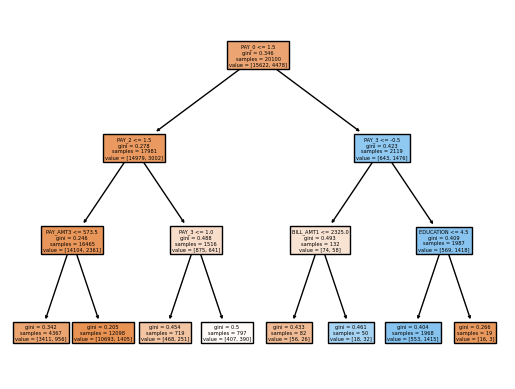

In [18]:
from sklearn.tree import plot_tree

plot_tree(decision_tree=model_dt, feature_names=X_train.columns, filled=True);

![](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F4756451%2F5724f9841b58cbd7838a851ac6df659b%2Frpqa6.jpg?generation=1608831884903054&alt=media)

*As you increase the complexity of the model (for example, the number of nodes of the tree), the the predictive error also increases, so a more easier model will make better predictions*

### [ ] 2nd Configuration

In [19]:
model_dt = DecisionTreeClassifier(min_samples_split=100)

In [20]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=100)

#### Accuracy

##### In `train` data

In [21]:
model_dt.score(X_train, y_train)

0.8443781094527363

##### In `test` data

In [22]:
model_dt.score(X_test, y_test)

0.7966666666666666

#### Model Visualization

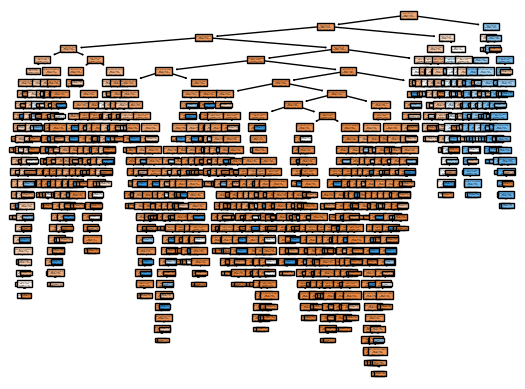

In [23]:
from sklearn.tree import plot_tree

plot_tree(decision_tree=model_dt, feature_names=X_train.columns, filled=True);

### 3rd Configuration

In [24]:
model_dt = DecisionTreeClassifier(max_depth=7)

In [25]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

#### Accuracy

##### In `train` data

In [26]:
model_dt.score(X_train, y_train)

0.8318905472636816

##### In `test` data

In [27]:
model_dt.score(X_test, y_test)

0.8166666666666667

#### Model Visualization

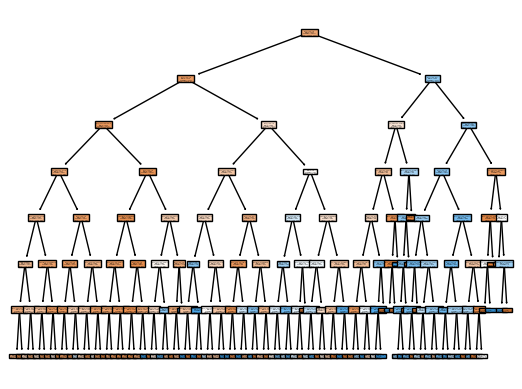

In [28]:
from sklearn.tree import plot_tree

plot_tree(decision_tree=model_dt, feature_names=X_train.columns, filled=True);

### 4th Configuration

In [29]:
model_dt = DecisionTreeClassifier(max_depth=9, criterion="entropy")

In [30]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9)

#### Accuracy

##### In `train` data

In [31]:
model_dt.score(X_train, y_train)

0.839502487562189

##### In `test` data

In [32]:
model_dt.score(X_test, y_test)

0.8092929292929293

#### Model Visualization

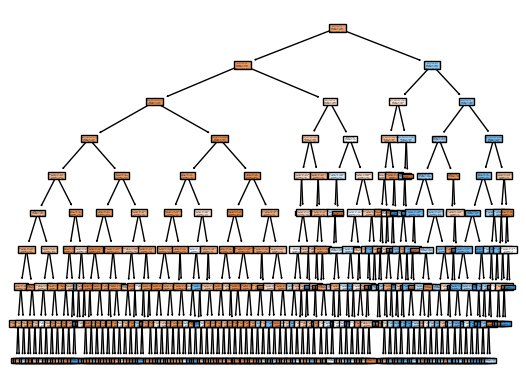

In [33]:
from sklearn.tree import plot_tree

plot_tree(decision_tree=model_dt, feature_names=X_train.columns, filled=True);

### 5th Configuration

In [34]:
model_dt = DecisionTreeClassifier(min_weight_fraction_leaf=0.3, min_samples_leaf=150)

In [35]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=150, min_weight_fraction_leaf=0.3)

#### Accuracy

##### In `train` data

In [36]:
model_dt.score(X_train, y_train)

0.7772139303482587

##### In `test` data

In [37]:
model_dt.score(X_test, y_test)

0.7820202020202021

#### Model Visualization

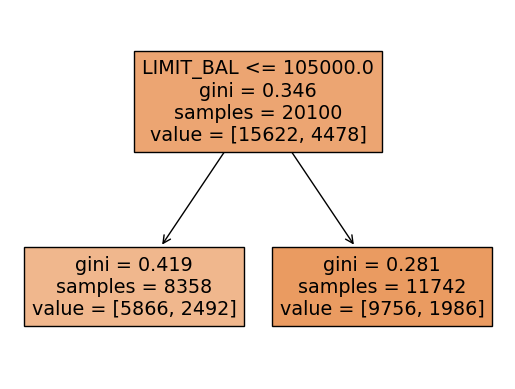

In [38]:
from sklearn.tree import plot_tree

plot_tree(decision_tree=model_dt, feature_names=X_train.columns, filled=True);

## [ ] `GridSearchCV()` to find Best Hyperparameters

*This function will do all the job for us and will find the best hyperparameters to our model by doing the same procedure that we did before*

***We can see first what configurations we can do in our model by calling this function***

In [39]:
model_dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 150,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.3,
 'random_state': None,
 'splitter': 'best'}

***We want to try the following combinations of `max_depth (6)`, `min_samples_leaf (7)` and `criterion (2)`:***

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
param_grid = {
    'max_depth': [None, 2, 3, 4, 5, 10],
    'min_samples_leaf': [1, 50, 100, 200, 400, 800, 1600],
    'criterion': ['gini', 'entropy']
}

*The `GridSearchCV()` function will test every parameter with our model and it gets the best parameters of each type`*

*To compare 84 different combinations of the Decision Tree hyperparameters:* 

In [42]:
6*7*2

84

In [43]:
cv_dt = GridSearchCV(estimator=model_dt, param_grid=param_grid, cv=5, verbose=1) #If we specify verbose=2, we will see how many fits we perform in the output

*Once we do `cv_dt.fit(X_train, y_train)`, this object will test with fitting the model with each parameter of the `param_grid`*

In [44]:
cv_dt.fit(X_train, y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(min_samples_leaf=150,
                                              min_weight_fraction_leaf=0.3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 10],
                         'min_samples_leaf': [1, 50, 100, 200, 400, 800, 1600]},
             verbose=1)

*The best hyperparameter configuration is:*

In [45]:
cv_dt.best_params_

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1}

*To achieve accuracy on the test set of:*

In [46]:
cv_dt.score(X_test, y_test)

0.7820202020202021

<img src="src/grid_search_cross_validation.png" style="margin-top: 100px"/>

## [ ] Other Models

Now let's try to find the best hyperparameter configuration of other models, which don't have the same hyperparameters than the Decision Tree because their algorithm and mathematical equation are different.

### Support Vector Machines `SVC()`

In [47]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/efR1C6CvhmE" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [48]:
from sklearn.svm import SVC

In [49]:
model_svc = SVC() #will be the 'estimator' parameter of GridSearchCV() function

*Now, we select the `param_grid`, the hyperparameters that we want to try with Cross Validation*

In [50]:
model_svc.get_params() #we see the parameters of Support Vector Classification Model

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [51]:
param_grid = {
    'C' : [0.1, 1, 10],
    'kernel' : ["linear", "rbf"]
}

In [52]:
cv_svc = GridSearchCV(estimator=model_svc, param_grid=param_grid, verbose=2)

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
scaler = MinMaxScaler()

In [55]:
scaler.fit(X=X_train)

MinMaxScaler()

In [56]:
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)

In [57]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [58]:
X_test_scaled

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,,,
2309,0.020202,0.0,0.333333,0.666667,0.074074,0.2,0.2,0.2,0.2,0.2,0.2,0.154363,0.075770,0.042355,0.171988,0.094248,0.191233,0.001717,0.001187,0.001674,0.002415,0.003517,0.003794
22405,0.141414,1.0,0.166667,0.666667,0.092593,0.2,0.2,0.2,0.2,0.2,0.2,0.267515,0.185467,0.103263,0.255826,0.157733,0.244564,0.005135,0.002514,0.003528,0.004262,0.006257,0.005063
23398,0.060606,1.0,0.500000,0.333333,0.203704,0.2,0.2,0.2,0.2,0.2,0.2,0.208569,0.131779,0.075357,0.225844,0.150168,0.238541,0.002783,0.001848,0.003348,0.003926,0.005861,0.004845
25059,0.121212,0.0,0.500000,0.666667,0.518519,0.2,0.2,0.2,0.2,0.2,0.1,0.164817,0.084210,0.045015,0.176055,0.091789,0.184498,0.001843,0.001073,0.007828,0.000043,0.016437,0.008362
2665,0.040404,1.0,0.333333,0.666667,0.277778,0.2,0.2,0.2,0.2,0.2,0.4,0.229900,0.111427,0.060192,0.178576,0.100772,0.195171,0.002290,0.000891,0.001116,0.002899,0.000000,0.001897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3673,0.090909,1.0,0.166667,0.666667,0.092593,0.1,0.1,0.0,0.0,0.0,0.0,0.169768,0.066151,0.035601,0.160069,0.080576,0.178505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9813,0.101010,0.0,0.333333,0.333333,0.203704,0.2,0.2,0.2,0.2,0.2,0.4,0.244032,0.168440,0.084272,0.204759,0.129141,0.217898,0.004408,0.001794,0.001840,0.005657,0.000000,0.003157
19632,0.161616,1.0,0.166667,0.333333,0.370370,0.2,0.2,0.2,0.2,0.2,0.2,0.228897,0.156420,0.092728,0.254308,0.182088,0.267960,0.004007,0.002969,0.004464,0.006441,0.009378,0.007588


*Now, we can finally run the `fit()` function inside our GridSearchCV object named as 'cv_svc'*

In [59]:
cv_svc.fit(X=X_train_scaled, y=y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   5.5s
[CV] END ...............................C=0.1, kernel=linear; total time=   5.1s
[CV] END ...............................C=0.1, kernel=linear; total time=   5.6s
[CV] END ...............................C=0.1, kernel=linear; total time=   5.5s
[CV] END ...............................C=0.1, kernel=linear; total time=   5.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   9.6s
[CV] END ..................................C=0.1, kernel=rbf; total time=  10.2s
[CV] END ..................................C=0.1, kernel=rbf; total time=  10.1s
[CV] END ..................................C=0.1, kernel=rbf; total time=  10.4s
[CV] END ..................................C=0.1, kernel=rbf; total time=  10.7s
[CV] END .................................C=1, kernel=linear; total time=   6.3s
[CV] END .................................C=1, ke

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             verbose=2)

*Now, let´s check what are the best parameters for this model, using the `best_params_` attribute of the cross validation algorithm object*

In [60]:
cv_svc.best_params_ #This parameters get the best score for our SVC model

{'C': 10, 'kernel': 'rbf'}

### K Nearest Neighbors`KNeighborsClassifier()`

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
model_kn = KNeighborsClassifier()

In [63]:
model_kn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [64]:
param_grid = { #the set of hyperparameters to test with the model
    'leaf_size' : [10, 20, 30, 50],
    'metric' : ["minkowski", "euclidean", "manhattan"],
    "n_neighbors": [3, 5, 10, 20]
}

In [65]:
cv_kn = GridSearchCV(estimator=model_kn, param_grid=param_grid, verbose=1)

*As this model computes the distances between the data, we will need to fit this GridSearchCV object with scaled X_train data*

In [66]:
cv_kn.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [10, 20, 30, 50],
                         'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 10, 20]},
             verbose=1)

In [67]:
cv_kn.best_params_

{'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 20}

## [ ] Best Model with Best Hyperparameters

In [70]:
dic_results = { #we create a dictionary
    
    'model': [ #here will be the names of the best of each model
        cv_dt.best_estimator_,
        cv_svc.best_estimator_,
        cv_kn.best_estimator_
    ],
    'hyperparameters': [ #their best hyperparameters
        cv_dt.best_params_,
        cv_svc.best_params_,
        cv_kn.best_params_
    ],
    'score': [ #and the score of each one
        cv_dt.score(X_test, y_test),
        cv_svc.score(X_test_scaled, y_test),
        cv_kn.score(X_test_scaled, y_test)
    ]
}

df_cv_comp = pd.DataFrame(dic_results)
df_cv_comp.style.background_gradient()

,model,hyperparameters,score
0,DecisionTreeClassifier(min_weight_fraction_leaf=0.3),"{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1}",0.782020
1,SVC(C=10),"{'C': 10, 'kernel': 'rbf'}",0.818889
2,"KNeighborsClassifier(leaf_size=10, n_neighbors=20)","{'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 20}",0.807677


*By this way, you will avoid overfitting*

model_dtl="DecisionTreeClassifiernse" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.